# Perform the following steps:
## 1.	Understand the dataset:

a.	Identify the shape of the dataset

b.	Identify variables with null values

c.	Identify variables with unique values

## 2.	Generate a separate dataset for numerical and categorical variables

## 3.	EDA of numerical variables:

a.	Missing value treatment

b.	Identify the skewness and distribution

c.	Identify significant variables using a correlation matrix 

d.	Pair plot for distribution and density

## 4.	EDA of categorical variables

a.	Missing value treatment

b.	Count plot and box plot for bivariate analysis

c.	Identify significant variables using p-values and Chi-Square values

## 5.	Combine all the significant categorical and numerical variables
## 6.	Plot box plot for the new dataset to find the variables with outliers

Note: The last two points are performed to make the new dataset ready for training and prediction.

In [1]:
#import the librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('PEP1.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functiol', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', '

# 1. Understand the dataset:
a. Identify the shape of the dataset

b. Identify variables with null values

c. Identify variables with unique values

## 1. a. Identify the shape of the dataset

In [5]:
df.shape

(1460, 81)

## 1. b. Identify variables with null values

In [6]:
df.isnull().sum().any()

True

In [7]:
df.isnull().sum().to_frame()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


## 1. c. Identify variables with unique values

In [8]:
df.nunique().to_frame()

,0
Id,1460
MSSubClass,15
MSZoning,5
LotFrontage,110
LotArea,1073
...,...
MoSold,12
YrSold,5
SaleType,9
SaleCondition,6


# 2. Generate a separate dataset for numerical and categorical variables

In [9]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [10]:
df_num=df.select_dtypes(exclude='object')
df_num.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchebvGr         int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [11]:
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [12]:
df_num.shape

(1460, 38)

In [13]:
df_obj=df.select_dtypes(exclude=['float','int'])
df_obj.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functiol         object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [14]:
df_obj.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [15]:
df_obj.shape

(1460, 43)

# 3. EDA of numerical variables:
a. Missing value treatment

b. Identify the skewness and distribution

c. Identify significant variables using a correlation matrix

d. Pair plot for distribution and density

## 3. a. Missing value treatment

In [16]:
df_num.isnull().sum()[df_num.isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [17]:
(df_num.isnull().sum()/len(df_num))*100

Id                0.000000
MSSubClass        0.000000
LotFrontage      17.739726
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        0.547945
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchebvGr        0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.547945
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
S

In [18]:
df_num.dropna(inplace=True)

In [19]:
df_num.shape

(1121, 38)

## 3. b. Identify the skewness and distribution

In [20]:
skew = df_num.skew(axis=0)
skew

Id                0.018663
MSSubClass        1.412907
LotFrontage       2.251197
LotArea          15.608113
OverallQual       0.287800
OverallCond       0.846451
YearBuilt        -0.618350
YearRemodAdd     -0.565757
MasVnrArea        2.706945
BsmtFinSF1        1.934077
BsmtFinSF2        4.399358
BsmtUnfSF         0.875774
TotalBsmtSF       1.754916
1stFlrSF          1.363783
2ndFlrSF          0.807411
LowQualFinSF     10.020823
GrLivArea         1.549961
BsmtFullBath      0.568804
BsmtHalfBath      4.107874
FullBath          0.015822
HalfBath          0.638178
BedroomAbvGr      0.074427
KitchebvGr        4.822542
TotRmsAbvGrd      0.723117
Fireplaces        0.643698
GarageYrBlt      -0.641738
GarageCars        0.206017
GarageArea        0.733894
WoodDeckSF        1.549793
OpenPorchSF       2.403928
EnclosedPorch     3.173250
3SsnPorch        10.854868
ScreenPorch       4.019111
PoolArea         13.783823
MiscVal           9.699989
MoSold            0.173039
YrSold            0.106730
S

In [21]:
def func(num):
    if num>0.5:
        return 'Positive Skew'
    elif num<-0.5:
        return 'Negative Skew'
    else:
        return 'Normal Distribution'

In [22]:
skew.apply(func)

Id               Normal Distribution
MSSubClass             Positive Skew
LotFrontage            Positive Skew
LotArea                Positive Skew
OverallQual      Normal Distribution
OverallCond            Positive Skew
YearBuilt              Negative Skew
YearRemodAdd           Negative Skew
MasVnrArea             Positive Skew
BsmtFinSF1             Positive Skew
BsmtFinSF2             Positive Skew
BsmtUnfSF              Positive Skew
TotalBsmtSF            Positive Skew
1stFlrSF               Positive Skew
2ndFlrSF               Positive Skew
LowQualFinSF           Positive Skew
GrLivArea              Positive Skew
BsmtFullBath           Positive Skew
BsmtHalfBath           Positive Skew
FullBath         Normal Distribution
HalfBath               Positive Skew
BedroomAbvGr     Normal Distribution
KitchebvGr             Positive Skew
TotRmsAbvGrd           Positive Skew
Fireplaces             Positive Skew
GarageYrBlt            Negative Skew
GarageCars       Normal Distribution
G

## 3. c. Identify significant variables using a correlation matrix

In [23]:
df_num.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.021937,-0.013289,-0.040711,-0.058269,0.004387,-0.020862,-0.027664,-0.073472,-0.013751,...,-0.025060,-0.001972,0.009935,-0.066833,0.015183,0.048010,0.045799,-0.000570,0.013407,-0.047122
MSSubClass,0.021937,1.000000,-0.386940,-0.198096,0.029522,-0.087859,0.025800,0.006645,0.040240,-0.070389,...,-0.017988,0.004054,-0.017790,-0.039739,-0.021789,0.003166,-0.040689,-0.027170,-0.012448,-0.088032
LotFrontage,-0.013289,-0.386940,1.000000,0.421184,0.241322,-0.046312,0.109726,0.086414,0.189969,0.241352,...,0.082166,0.161815,0.014261,0.069716,0.035906,0.211746,0.001471,0.018815,0.013267,0.344270
LotArea,-0.040711,-0.198096,0.421184,1.000000,0.167525,-0.034348,0.029205,0.026848,0.106115,0.230441,...,0.133576,0.099170,-0.023631,0.012520,0.072517,0.109147,0.012790,0.008998,-0.006904,0.299962
OverallQual,-0.058269,0.029522,0.241322,0.167525,1.000000,-0.163157,0.589385,0.570757,0.423988,0.249500,...,0.282512,0.340679,-0.144344,0.017331,0.055296,0.080131,-0.062064,0.079895,-0.008903,0.797881
OverallCond,0.004387,-0.087859,-0.046312,-0.034348,-0.163157,1.000000,-0.426462,0.039402,-0.166762,-0.054788,...,-0.010835,-0.076273,0.062748,-0.006861,0.087030,-0.023566,0.119772,-0.014236,0.041003,-0.124391
YearBuilt,-0.020862,0.025800,0.109726,0.029205,0.589385,-0.426462,1.000000,0.623171,0.332190,0.236941,...,0.238548,0.235432,-0.392693,0.027948,-0.063694,0.006717,-0.096973,0.013784,-0.004585,0.525394
YearRemodAdd,-0.027664,0.006645,0.086414,0.026848,0.570757,0.039402,0.623171,1.000000,0.193376,0.120774,...,0.244602,0.260521,-0.214115,0.026304,-0.034288,0.019307,-0.040420,0.026884,0.041302,0.521253
MasVnrArea,-0.073472,0.040240,0.189969,0.106115,0.423988,-0.166762,0.332190,0.193376,1.000000,0.285331,...,0.174649,0.129532,-0.116832,0.022331,0.052646,0.021648,-0.054044,0.015850,-0.017569,0.488658
BsmtFinSF1,-0.013751,-0.070389,0.241352,0.230441,0.249500,-0.054788,0.236941,0.120774,0.285331,1.000000,...,0.206246,0.127900,-0.105410,0.021831,0.059635,0.194349,0.003027,-0.015281,0.010224,0.390301


<AxesSubplot:>

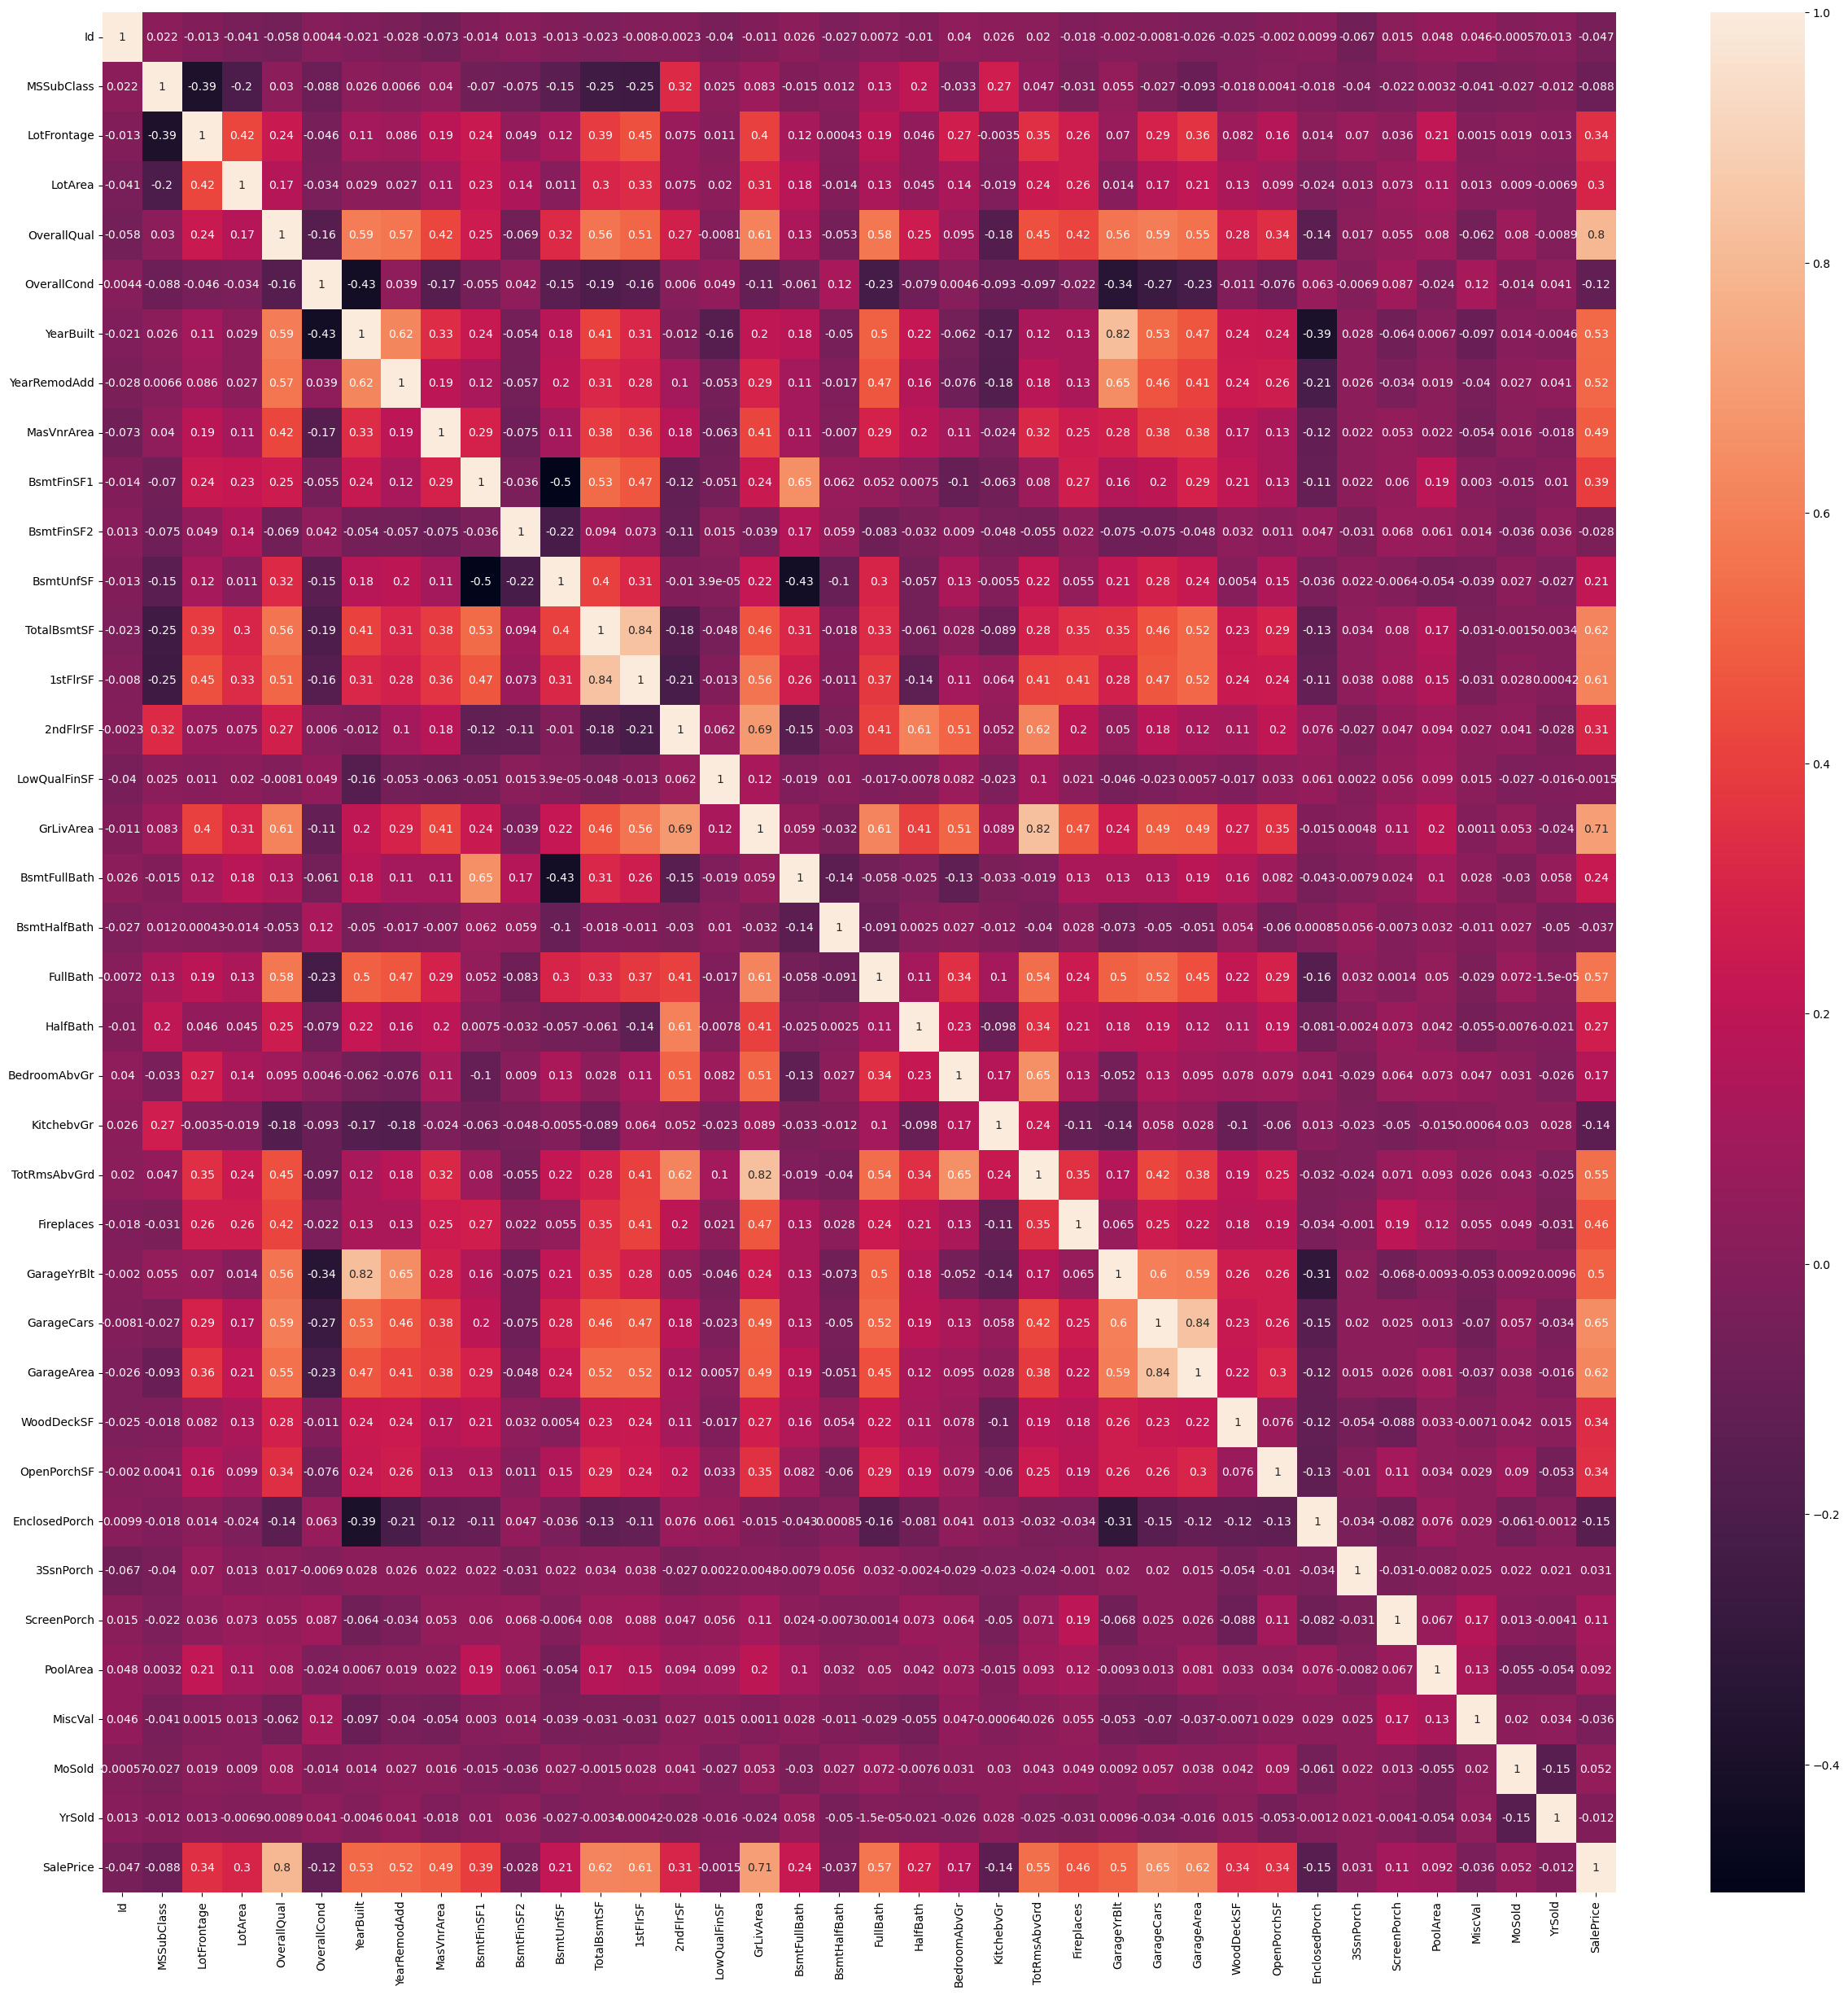

In [24]:
plt.figure(figsize=(30,30))
sns.heatmap(df_num.corr(),annot=True)

# 3. d. Pair plot for distribution and density

<Figure size 1500x800 with 0 Axes>

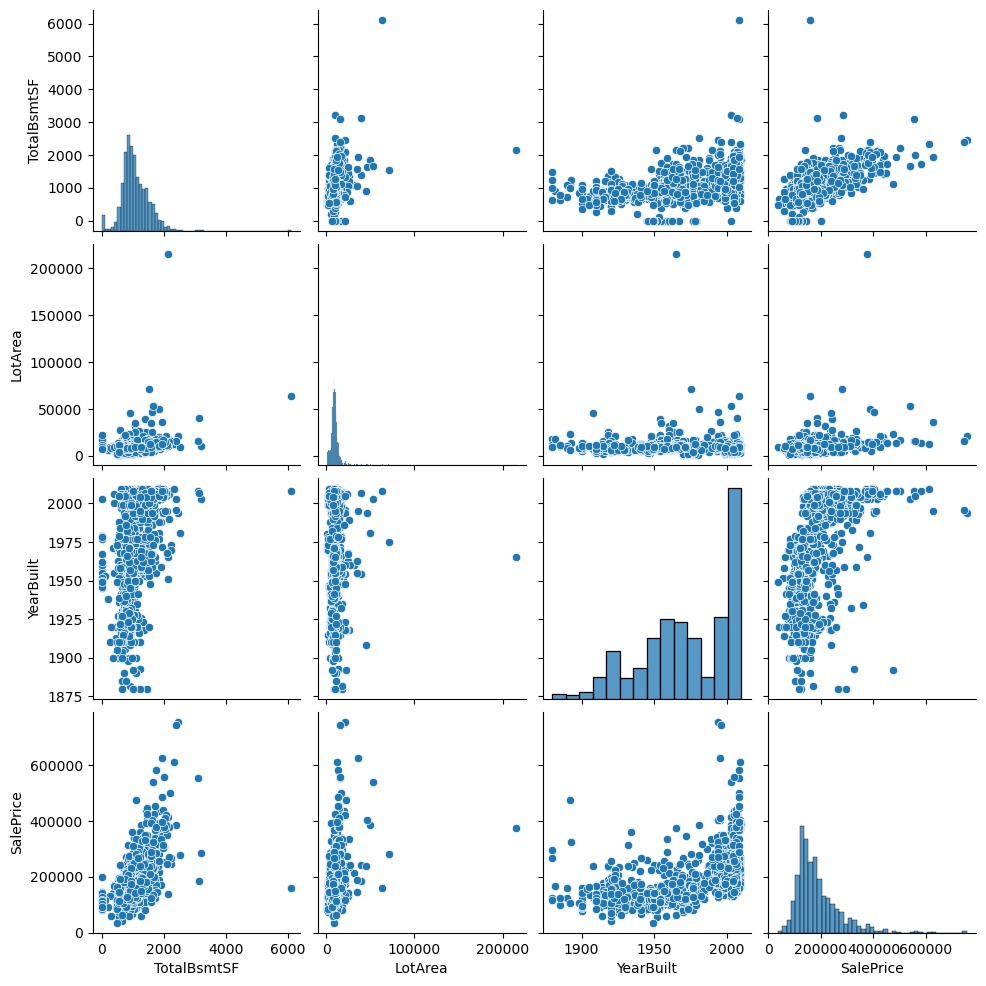

In [25]:
plt.figure(figsize=(15,8))
cols=['TotalBsmtSF','LotArea','YearBuilt','SalePrice']
sns.pairplot(df_num,vars=cols)

<Figure size 1500x800 with 0 Axes>

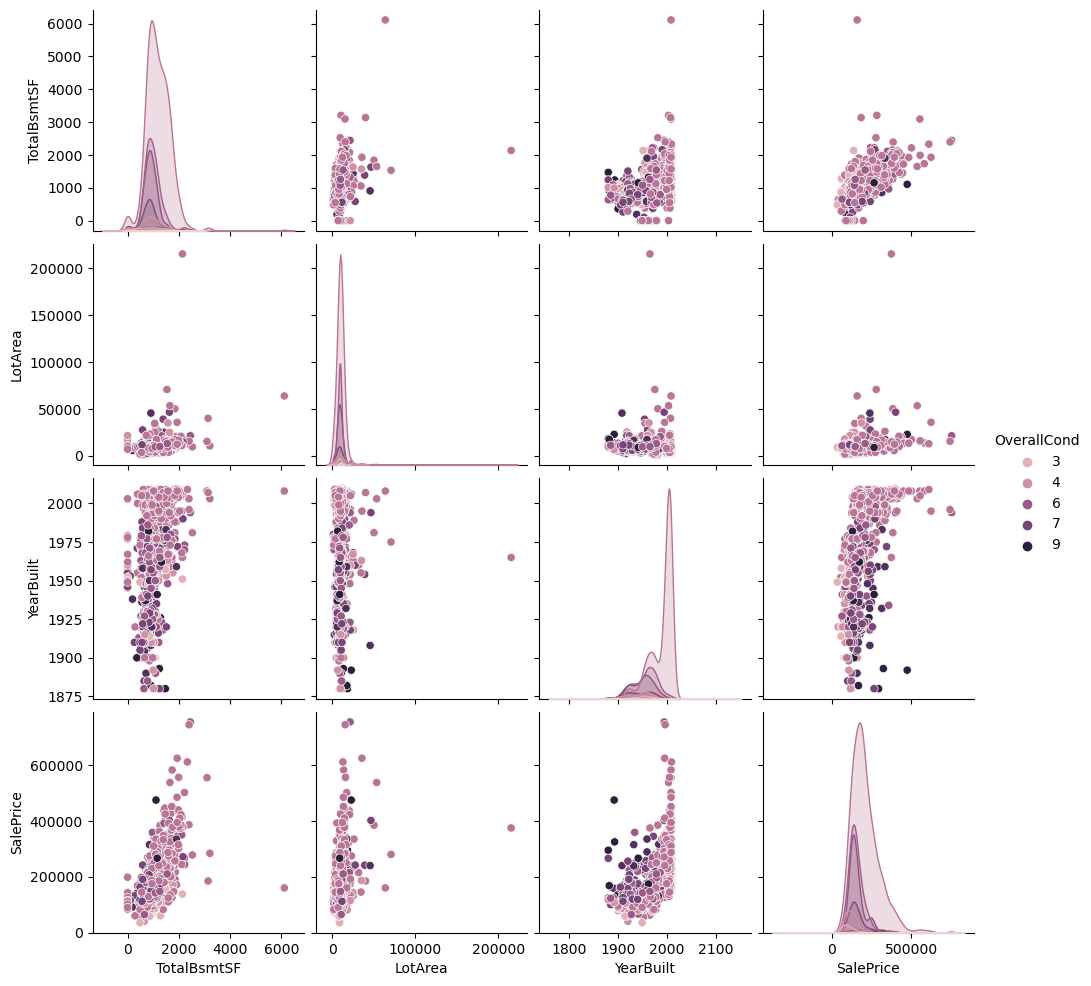

In [26]:
plt.figure(figsize=(15,8))
cols=['TotalBsmtSF','LotArea','YearBuilt','SalePrice']
sns.pairplot(df_num,vars=cols,hue='OverallCond')

# 4. EDA of categorical variables
a. Missing value treatment

b. Count plot and box plot for bivariate analysis

c. Identify significant variables using p-values and Chi-Square values

In [27]:
df_obj.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## 4. a. Missing value treatment

In [28]:
df_obj.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functiol            0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [29]:
df_obj.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)

In [30]:
df_obj.isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functiol          0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [31]:
df_obj.dropna(inplace=True)

In [32]:
df_obj.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functiol,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [33]:
df_obj.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functiol         0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [34]:
df_obj.shape

(1338, 38)

## 4. b. Count plot and box plot for bivariate analysis

In [35]:
df_obj.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [36]:
crosstab=pd.crosstab(index=df_obj['Electrical'],columns=df_obj['SaleCondition'])

<AxesSubplot:>

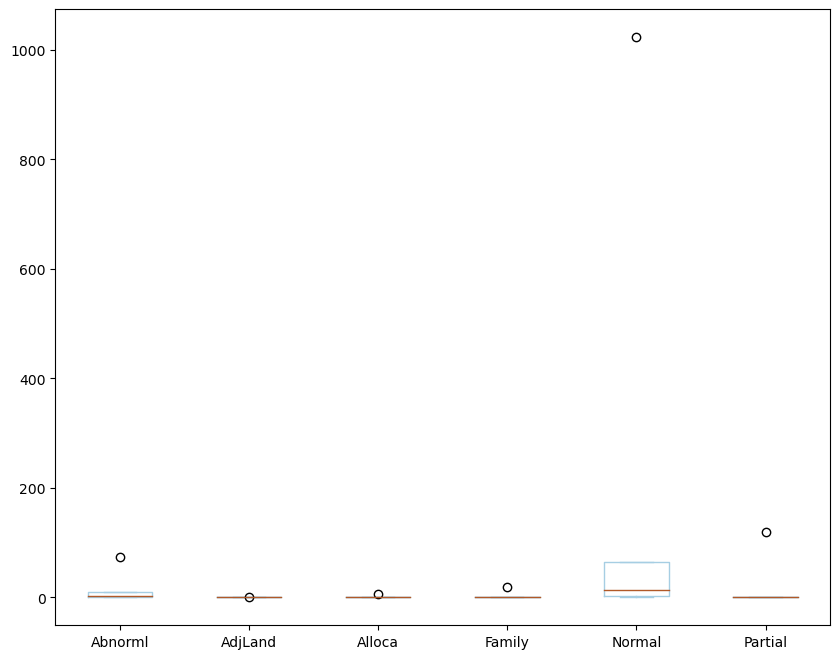

In [37]:
crosstab.plot(kind='box',figsize=(10,8),stacked=True,colormap='Paired')

<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

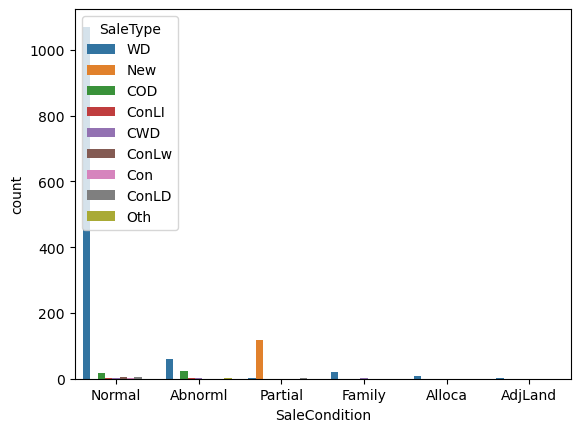

In [38]:
sns.countplot(data=df_obj,x='SaleCondition',hue='SaleType')

## 4. c. Identify significant variables using p-values and Chi-Square values

In [40]:
import scipy.stats
from scipy.stats import chi2

In [41]:
ct_table=pd.crosstab(df_obj['SaleCondition'],df_obj['SaleType'])
print('contingency_table :\n',ct_table)

contingency_table :
 SaleType       COD  CWD  Con  ConLD  ConLI  ConLw  New  Oth    WD
SaleCondition                                                    
Abnorml         24    1    0      0      1      0    0    1    59
AdjLand          0    0    0      0      0      0    0    0     1
Alloca           0    0    0      0      0      0    0    0     7
Family           0    1    0      0      0      0    0    0    19
Normal          18    2    2      5      3      4    0    0  1070
Partial          0    0    0      1      0      0  117    0     2


In [44]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table)
 
print(f"chi2 statistic:     {chi2_stat}")
print(f"p-value:            {p}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     1522.601445269729
p-value:            1.1136083863268581e-293
degrees of freedom: 40
expected frequencies:
 [[2.69955157e+00 2.57100149e-01 1.28550075e-01 3.85650224e-01
  2.57100149e-01 2.57100149e-01 7.52017937e+00 6.42750374e-02
  7.44304933e+01]
 [3.13901345e-02 2.98953662e-03 1.49476831e-03 4.48430493e-03
  2.98953662e-03 2.98953662e-03 8.74439462e-02 7.47384155e-04
  8.65470852e-01]
 [2.19730942e-01 2.09267564e-02 1.04633782e-02 3.13901345e-02
  2.09267564e-02 2.09267564e-02 6.12107623e-01 5.23168909e-03
  6.05829596e+00]
 [6.27802691e-01 5.97907324e-02 2.98953662e-02 8.96860987e-02
  5.97907324e-02 5.97907324e-02 1.74887892e+00 1.49476831e-02
  1.73094170e+01]
 [3.46547085e+01 3.30044843e+00 1.65022422e+00 4.95067265e+00
  3.30044843e+00 3.30044843e+00 9.65381166e+01 8.25112108e-01
  9.55479821e+02]
 [3.76681614e+00 3.58744395e-01 1.79372197e-01 5.38116592e-01
  3.58744395e-01 3.58744395e-01 1.04932735e+01 8.96860987e-02
  1.03856502e+02]]


# 5. Combine all the significant categorical and numerical variables

In [66]:
df_obj.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [62]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [68]:
OneHot=df_obj['Condition1'].str.get_dummies('|')

In [69]:
OneHot

,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn
0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,0,0,0,0
1456,0,0,1,0,0,0,0,0,0
1457,0,0,1,0,0,0,0,0,0
1458,0,0,1,0,0,0,0,0,0


In [70]:
df_com=df_obj.copy()

In [71]:
df_com=pd.concat([df_obj,OneHot],axis=1)

In [73]:
df_com

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,SaleCondition,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Normal,0,0,1,0,0,0,0,0,0
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Normal,0,1,0,0,0,0,0,0,0
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Normal,0,0,1,0,0,0,0,0,0
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Abnorml,0,0,1,0,0,0,0,0,0
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Normal,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Normal,0,0,1,0,0,0,0,0,0
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,Normal,0,0,1,0,0,0,0,0,0
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Normal,0,0,1,0,0,0,0,0,0
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,Norm,...,Normal,0,0,1,0,0,0,0,0,0


# 6. Plot box plot for the new dataset to find the variables with outliers

In [75]:
df_outlier=df.copy()

<AxesSubplot:>

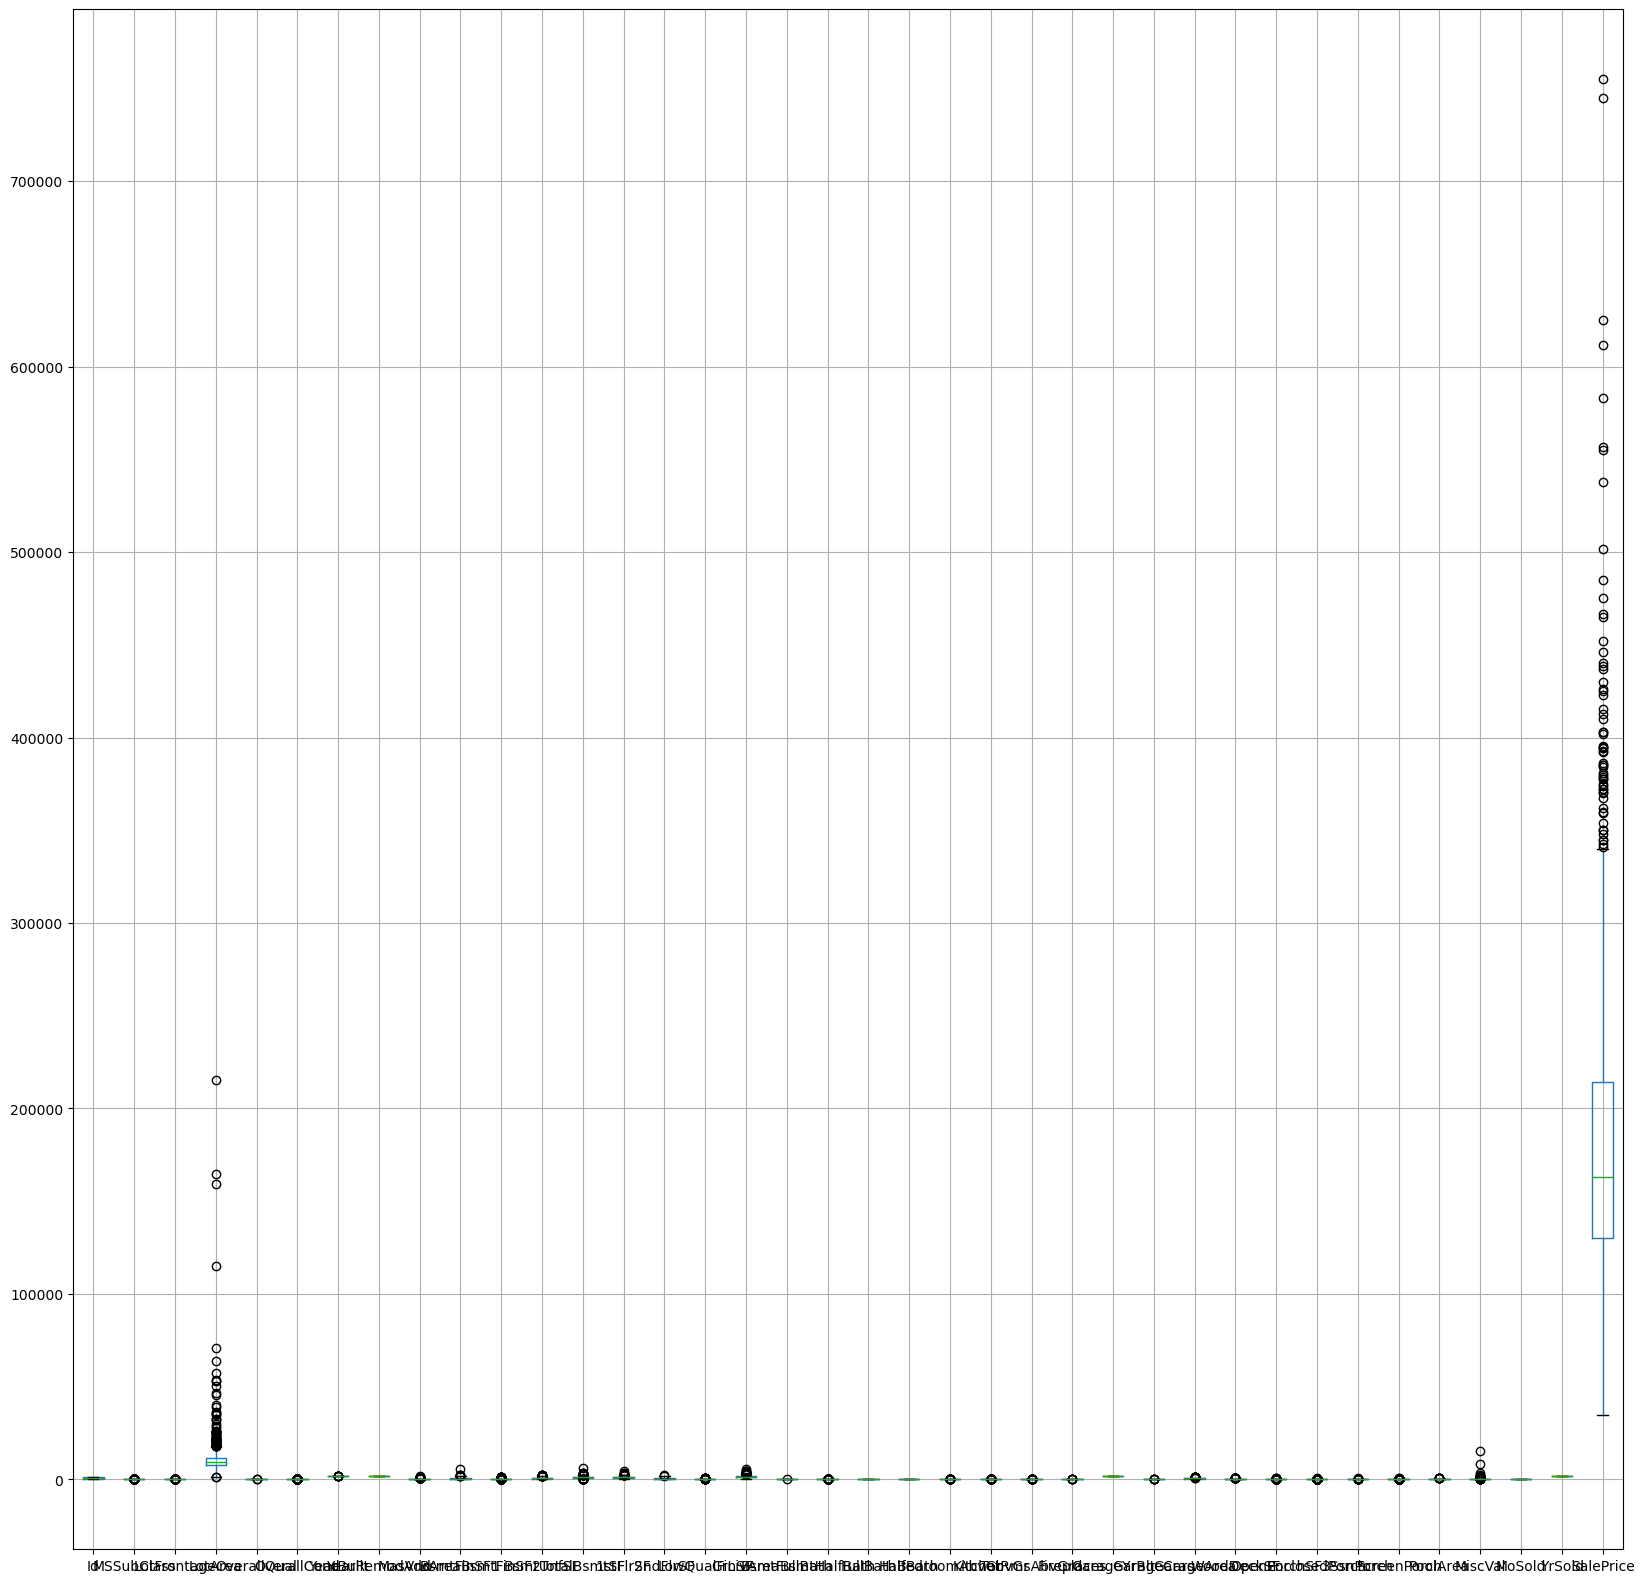

In [77]:
plt.figure(figsize=(20,20))
df_outlier.boxplot()